# [Intro to Recurrent Neural Networks using LSTMs](https://www.kaggle.com/nafisur/intro-to-recurrent-neural-networks-using-lstms)

In [1]:
# => pustaka 
import math
import numpy as np
import pandas as pd

# => pustaka pra-proses data
from sklearn.preprocessing import MinMaxScaler

# => pustaka model LSTM-RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# => pustaka evaluasi model
from sklearn.metrics import mean_squared_error

# => pustaka visualisasi data
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# First, we get the data
dataset = pd.read_csv('D:/Belajar Python/dataset/dataset ibm/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [3]:
print(dataset)

              Open    High     Low   Close    Volume Name
Date                                                     
2006-01-03   82.45   82.55   80.81   82.06  11715200  IBM
2006-01-04   82.20   82.50   81.33   81.95   9840600  IBM
2006-01-05   81.40   82.90   81.00   82.50   7213500  IBM
2006-01-06   83.95   85.03   83.41   84.95   8197400  IBM
2006-01-09   84.10   84.25   83.38   83.73   6858200  IBM
...            ...     ...     ...     ...       ...  ...
2017-12-22  151.82  153.00  151.50  152.50   2990583  IBM
2017-12-26  152.51  153.86  152.50  152.83   2479017  IBM
2017-12-27  152.95  153.18  152.61  153.13   2149257  IBM
2017-12-28  153.20  154.12  153.20  154.04   2687624  IBM
2017-12-29  154.17  154.72  153.42  153.42   3327087  IBM

[3020 rows x 6 columns]


In [4]:
# Checking for missing values
training_set = dataset[:'2017'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [5]:
belajar = pd.DataFrame(training_set, columns=["Data Training"])
print(belajar)

      Data Training
0             82.55
1             82.50
2             82.90
3             85.03
4             84.25
...             ...
3015         153.00
3016         153.86
3017         153.18
3018         154.12
3019         154.72

[3020 rows x 1 columns]


In [6]:
belajar = pd.DataFrame(test_set, columns=["Data Training"])
print(belajar)

     Data Training
0           167.87
1           169.87
2           169.39
3           169.92
4           169.80
..             ...
246         153.00
247         153.86
248         153.18
249         154.12
250         154.72

[251 rows x 1 columns]


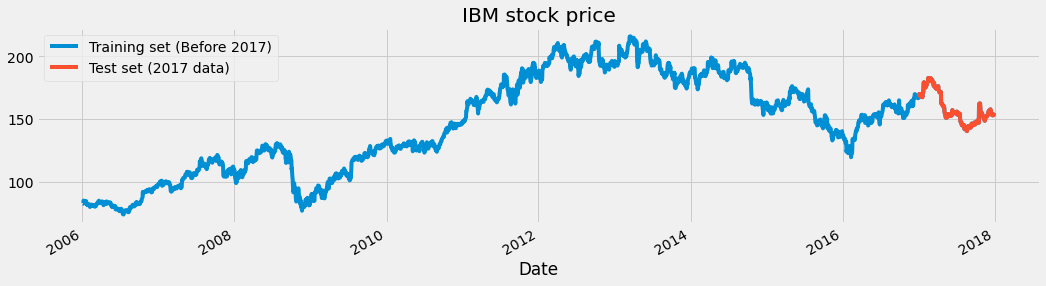

In [7]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2017'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 data)'])
plt.title('IBM stock price')
plt.show()

In [8]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
belajar = pd.DataFrame(training_set_scaled, columns=["Data Train Max-Min"])
belajar

,Data Train Max-Min
0,0.060651
1,0.060299
2,0.063116
3,0.078121
4,0.072626
...,...
3015,0.556917
3016,0.562975
3017,0.558185
3018,0.564807


In [10]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,3020):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
print(X_train.shape, y_train.shape)

(2960, 60) (2960,)


In [12]:
# X_train
belajar = pd.DataFrame(X_train)
belajar

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.060651,0.060299,0.063116,0.078121,0.072626,0.071710,0.076571,0.070583,0.066991,0.064948,...,0.068893,0.066709,0.069104,0.077839,0.075655,0.072767,0.068893,0.065652,0.066568,0.067695
1,0.060299,0.063116,0.078121,0.072626,0.071710,0.076571,0.070583,0.066991,0.064948,0.075796,...,0.066709,0.069104,0.077839,0.075655,0.072767,0.068893,0.065652,0.066568,0.067695,0.068752
2,0.063116,0.078121,0.072626,0.071710,0.076571,0.070583,0.066991,0.064948,0.075796,0.073612,...,0.069104,0.077839,0.075655,0.072767,0.068893,0.065652,0.066568,0.067695,0.068752,0.068047
3,0.078121,0.072626,0.071710,0.076571,0.070583,0.066991,0.064948,0.075796,0.073612,0.064173,...,0.077839,0.075655,0.072767,0.068893,0.065652,0.066568,0.067695,0.068752,0.068047,0.067977
4,0.072626,0.071710,0.076571,0.070583,0.066991,0.064948,0.075796,0.073612,0.064173,0.056213,...,0.075655,0.072767,0.068893,0.065652,0.066568,0.067695,0.068752,0.068047,0.067977,0.069315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,0.506622,0.505424,0.513666,0.516061,0.514793,0.518456,0.513595,0.520217,0.528388,0.525007,...,0.571217,0.577275,0.591082,0.583192,0.571781,0.562553,0.565230,0.565159,0.563187,0.560158
2956,0.505424,0.513666,0.516061,0.514793,0.518456,0.513595,0.520217,0.528388,0.525007,0.520921,...,0.577275,0.591082,0.583192,0.571781,0.562553,0.565230,0.565159,0.563187,0.560158,0.556917
2957,0.513666,0.516061,0.514793,0.518456,0.513595,0.520217,0.528388,0.525007,0.520921,0.520640,...,0.591082,0.583192,0.571781,0.562553,0.565230,0.565159,0.563187,0.560158,0.556917,0.562975
2958,0.516061,0.514793,0.518456,0.513595,0.520217,0.528388,0.525007,0.520921,0.520640,0.519372,...,0.583192,0.571781,0.562553,0.565230,0.565159,0.563187,0.560158,0.556917,0.562975,0.558185


In [13]:
# y_train
belajar = pd.DataFrame(y_train)
belajar

,0
0,0.068752
1,0.068047
2,0.067977
3,0.069315
4,0.074035
...,...
2955,0.556917
2956,0.562975
2957,0.558185
2958,0.564807


In [14]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [15]:
belajar = pd.DataFrame.from_records(X_train)

In [16]:
belajar

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,[0.06065088757396442],[0.06029867568329106],[0.06311637080867849],[0.07812059735136656],[0.07262609185686109],[0.07171034094111017],[0.07657086503240351],[0.07058326289095518],[0.06699070160608622],[0.06494787264018032],...,[0.06889264581572274],[0.06670893209354745],[0.06910397295012671],[0.07783882783882778],[0.0756551141166526],[0.07276697661313036],[0.06889264581572274],[0.06565229642152715],[0.06656804733727806],[0.06769512538743305]
1,[0.06029867568329106],[0.06311637080867849],[0.07812059735136656],[0.07262609185686109],[0.07171034094111017],[0.07657086503240351],[0.07058326289095518],[0.06699070160608622],[0.06494787264018032],[0.07579599887292199],...,[0.06670893209354745],[0.06910397295012671],[0.07783882783882778],[0.0756551141166526],[0.07276697661313036],[0.06889264581572274],[0.06565229642152715],[0.06656804733727806],[0.06769512538743305],[0.06875176105945335]
2,[0.06311637080867849],[0.07812059735136656],[0.07262609185686109],[0.07171034094111017],[0.07657086503240351],[0.07058326289095518],[0.06699070160608622],[0.06494787264018032],[0.07579599887292199],[0.07361228515074669],...,[0.06910397295012671],[0.07783882783882778],[0.0756551141166526],[0.07276697661313036],[0.06889264581572274],[0.06565229642152715],[0.06656804733727806],[0.06769512538743305],[0.06875176105945335],[0.06804733727810641]
3,[0.07812059735136656],[0.07262609185686109],[0.07171034094111017],[0.07657086503240351],[0.07058326289095518],[0.06699070160608622],[0.06494787264018032],[0.07579599887292199],[0.07361228515074669],[0.06417300648069879],...,[0.07783882783882778],[0.0756551141166526],[0.07276697661313036],[0.06889264581572274],[0.06565229642152715],[0.06656804733727806],[0.06769512538743305],[0.06875176105945335],[0.06804733727810641],[0.06797689489997183]
4,[0.07262609185686109],[0.07171034094111017],[0.07657086503240351],[0.07058326289095518],[0.06699070160608622],[0.06494787264018032],[0.07579599887292199],[0.07361228515074669],[0.06417300648069879],[0.056213017751479244],...,[0.0756551141166526],[0.07276697661313036],[0.06889264581572274],[0.06565229642152715],[0.06656804733727806],[0.06769512538743305],[0.06875176105945335],[0.06804733727810641],[0.06797689489997183],[0.0693153000845308]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,[0.5066215835446606],[0.5054240631163707],[0.5136658213581291],[0.5160608622147083],[0.514792899408284],[0.5184559030712876],[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],...,[0.5712172442941674],[0.5772752888137502],[0.5910819949281487],[0.5831924485770639],[0.571780783319245],[0.562552831783601],[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217]
2956,[0.5054240631163707],[0.5136658213581291],[0.5160608622147083],[0.514792899408284],[0.5184559030712876],[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],...,[0.5772752888137502],[0.5910819949281487],[0.5831924485770639],[0.571780783319245],[0.562552831783601],[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217],[0.5569174415328262]
2957,[0.5136658213581291],[0.5160608622147083],[0.514792899408284],[0.5184559030712876],[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],[0.5206396167934628],...,[0.5910819949281487],[0.5831924485770639],[0.571780783319245],[0.562552831783601],[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217],[0.5569174415328262],[0.5629754860524092]
2958,[0.5160608622147083],[0.514792899408284],[0.5184559030712876],[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],[0.5206396167934628],[0.5193716539870386],...,[0.5831924485770639],[0.571780783319245],[0.562552831783601],[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217]

In [17]:
# The RNN architecture
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
93/93 [==============================] - 29s 143ms/step - loss: 0.0577
Epoch 2/50
93/93 [==============================] - 14s 149ms/step - loss: 0.0046
Epoch 3/50
93/93 [==============================] - 14s 152ms/step - loss: 0.0049
Epoch 4/50
93/93 [==============================] - 13s 135ms/step - loss: 0.0044
Epoch 5/50
93/93 [==============================] - 13s 141ms/step - loss: 0.0038
Epoch 6/50
93/93 [==============================] - 13s 142ms/step - loss: 0.0036
Epoch 7/50
93/93 [==============================] - 13s 144ms/step - loss: 0.0040
Epoch 8/50
93/93 [==============================] - 13s 145ms/step - loss: 0.0038
Epoch 9/50
93/93 [==============================] - 13s 145ms/step - loss: 0.0035
Epoch 10/50
93/93 [==============================] - 13s 143ms/step - loss: 0.0031
Epoch 11/50
93/93 [==============================] - 13s 135ms/step - loss: 0.0030
Epoch 12/50
93/93 [==============================] - 13s 139ms/step - loss: 0.0031
Epoch 13/50
9

In [18]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [19]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2017'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [20]:
# Data latih
dataset["High"][:'2017']

Date
2006-01-03     82.55
2006-01-04     82.50
2006-01-05     82.90
2006-01-06     85.03
2006-01-09     84.25
               ...  
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, Length: 3020, dtype: float64

In [21]:
# Data Uji
dataset["High"]['2017':]

Date
2017-01-03    167.87
2017-01-04    169.87
2017-01-05    169.39
2017-01-06    169.92
2017-01-09    169.80
               ...  
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, Length: 251, dtype: float64

In [22]:
# Data Latih + Data Ujia
dataset_total

Date
2006-01-03     82.55
2006-01-04     82.50
2006-01-05     82.90
2006-01-06     85.03
2006-01-09     84.25
               ...  
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, Length: 3271, dtype: float64

In [23]:
# 251 + 60 => inputs
belajar = pd.DataFrame(inputs, columns=["Inputs"]) #.shape
belajar

,Inputs
0,0.518456
1,0.513595
2,0.520217
3,0.528388
4,0.525007
...,...
306,0.556917
307,0.562975
308,0.558185
309,0.564807


In [24]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [25]:
# Data Uji
belajar = pd.DataFrame.from_records(X_test)
belajar

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,[0.5184559030712876],[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],[0.5206396167934628],[0.5193716539870386],[0.5154973231896309],[0.6148915187376724],...,[0.562552831783601],[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217],[0.5569174415328262],[0.5629754860524092],[0.5581854043392505],[0.564806987883911],[0.569033530571992]
1,[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],[0.5206396167934628],[0.5193716539870386],[0.5154973231896309],[0.6148915187376724],[0.612989574528036],...,[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217],[0.5569174415328262],[0.5629754860524092],[0.5581854043392505],[0.564806987883911],[0.569033530571992],[0.661665257819104]
2,[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],[0.5206396167934628],[0.5193716539870386],[0.5154973231896309],[0.6148915187376724],[0.612989574528036],[0.6236968160045082],...,[0.5651591997745842],[0.563186813186813],[0.5601577909270217],[0.5569174415328262],[0.5629754860524092],[0.5581854043392505],[0.564806987883911],[0.569033530571992],[0.661665257819104],[0.6757537334460411]
3,[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],[0.5206396167934628],[0.5193716539870386],[0.5154973231896309],[0.6148915187376724],[0.612989574528036],[0.6236968160045082],[0.6239081431389122],...,[0.563186813186813],[0.5601577909270217],[0.5569174415328262],[0.5629754860524092],[0.5581854043392505],[0.564806987883911],[0.569033530571992],[0.661665257819104],[0.6757537334460411],[0.6723724992955762]
4,[0.5250070442378134],[0.5209213863060016],[0.5206396167934628],[0.5193716539870386],[0.5154973231896309],[0.6148915187376724],[0.612989574528036],[0.6236968160045082],[0.6239081431389122],[0.6041138348830655],...,[0.5601577909270217],[0.5569174415328262],[0.5629754860524092],[0.5581854043392505],[0.564806987883911],[0.569033530571992],[0.661665257819104],[0.6757537334460411],[0.6723724992955762],[0.6761059453367144]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,[0.5066215835446606],[0.5054240631163707],[0.5136658213581291],[0.5160608622147083],[0.514792899408284],[0.5184559030712876],[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],...,[0.5712172442941674],[0.5772752888137502],[0.5910819949281487],[0.5831924485770639],[0.571780783319245],[0.562552831783601],[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217]
247,[0.5054240631163707],[0.5136658213581291],[0.5160608622147083],[0.514792899408284],[0.5184559030712876],[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],...,[0.5772752888137502],[0.5910819949281487],[0.5831924485770639],[0.571780783319245],[0.562552831783601],[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217],[0.5569174415328262]
248,[0.5136658213581291],[0.5160608622147083],[0.514792899408284],[0.5184559030712876],[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],[0.5206396167934628],...,[0.5910819949281487],[0.5831924485770639],[0.571780783319245],[0.562552831783601],[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217],[0.5569174415328262],[0.5629754860524092]
249,[0.5160608622147083],[0.514792899408284],[0.5184559030712876],[0.5135953789799943],[0.5202169625246547],[0.5283882783882783],[0.5250070442378134],[0.5209213863060016],[0.5206396167934628],[0.5193716539870386],...,[0.5831924485770639],[0.571780783319245],[0.562552831783601],[0.565229642152719],[0.5651591997745842],[0.563186813186813],[0.5601577909270217],[0.5569174415328262],[0.5629754860524092],[0.5581854043392505]


In [26]:
# Hasil Prediksi Harga Saham IBM
belajar = pd.DataFrame.from_records(predicted_stock_price, columns=["Hasil Prediksi"])
belajar

,Hasil Prediksi
0,154.189590
1,156.771957
2,161.105743
3,165.259430
4,168.133209
...,...
246,154.160522
247,153.906219
248,153.821808
249,153.782990


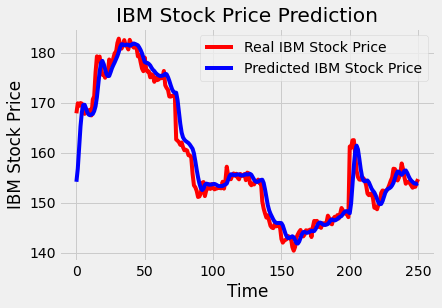

In [27]:
# Visualizing the results
plt.plot(test_set, color='red',label='Real IBM Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [28]:
# Evaluating our model
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 2.795899658079658.
